# 데이터 정규화

## 데이터 불러오기 및 확인

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('../data/Fvote.csv')
data.head()

,edu,income,age,score_gov,score_progress,score_intention,vote,parties,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam
0,3,3,3,2,2,4.0,1,2,0,1,0,0,0,0,1
1,2,3,3,2,4,3.0,0,3,0,1,0,0,1,0,0
2,1,2,4,1,3,2.8,1,4,0,1,0,1,0,0,0
3,2,1,3,5,4,2.6,1,1,1,0,0,0,0,1,0
4,1,2,4,4,3,2.4,1,1,0,1,0,0,0,1,0


In [4]:
data.describe()

,edu,income,age,score_gov,score_progress,score_intention,vote,parties,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,1.867299,2.208531,2.654028,3.056872,3.094787,2.910900,0.710900,2.668246,0.341232,0.658768,0.080569,0.090047,0.094787,0.597156,0.137441
std,0.625963,1.066424,0.872173,0.944451,0.961408,0.725078,0.454422,1.220416,0.475251,0.475251,0.272819,0.286930,0.293617,0.491636,0.345131
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,2.000000,2.400000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,3.000000,3.000000,4.000000,4.000000,3.400000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'edu'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'score_gov'}>],
       [<AxesSubplot:title={'center':'score_progress'}>,
        <AxesSubplot:title={'center':'score_intention'}>,
        <AxesSubplot:title={'center':'vote'}>,
        <AxesSubplot:title={'center':'parties'}>],
       [<AxesSubplot:title={'center':'gender_female'}>,
        <AxesSubplot:title={'center':'gender_male'}>,
        <AxesSubplot:title={'center':'region_Chungcheung'}>,
        <AxesSubplot:title={'center':'region_Honam'}>],
       [<AxesSubplot:title={'center':'region_Others'}>,
        <AxesSubplot:title={'center':'region_Sudo'}>,
        <AxesSubplot:title={'center':'region_Youngnam'}>, <AxesSubplot:>]],
      dtype=object)

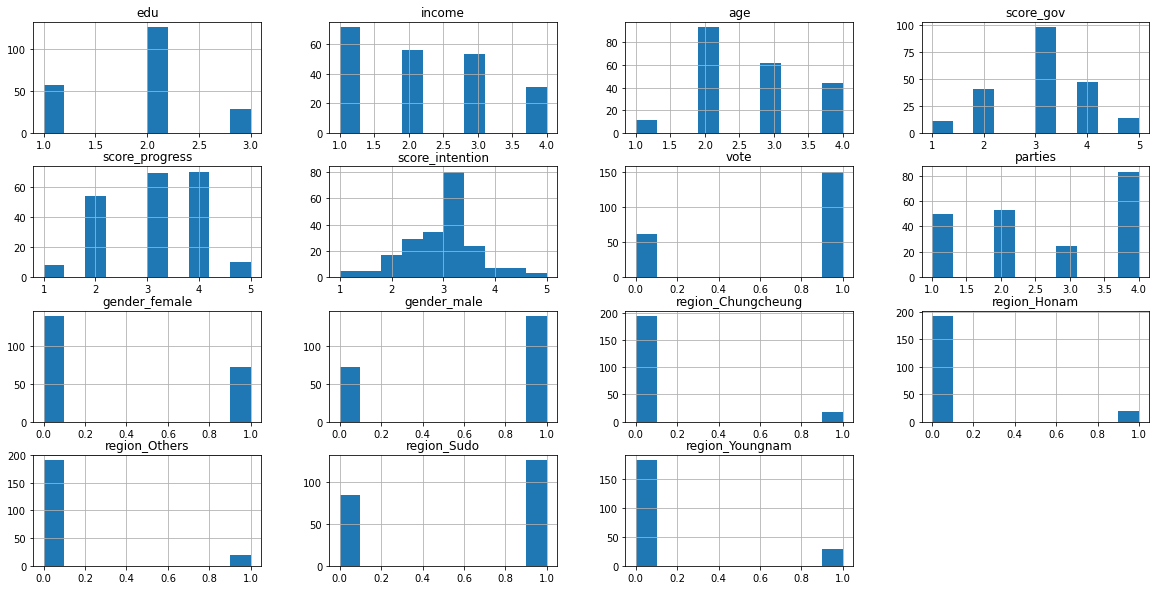

In [5]:
data.hist(figsize=(20,10))

In [8]:
X = data.loc[:, ~data.columns.isin(['vote','parties'])]  # vote, parties를 제외한 데이터를 X로 사용
X

,edu,income,age,score_gov,score_progress,score_intention,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam
0,3,3,3,2,2,4.0,0,1,0,0,0,0,1
1,2,3,3,2,4,3.0,0,1,0,0,1,0,0
2,1,2,4,1,3,2.8,0,1,0,1,0,0,0
3,2,1,3,5,4,2.6,1,0,0,0,0,1,0
4,1,2,4,4,3,2.4,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,1,4,4,3,3,1.8,0,1,0,0,0,0,1
207,2,1,2,3,4,2.6,0,1,0,0,0,1,0
208,2,1,2,3,3,2.6,0,1,1,0,0,0,0
209,2,3,4,3,2,4.0,0,1,0,0,0,1,0


In [9]:
y = data[['vote']]
y

,vote
0,1
1,0
2,1
3,1
4,1
...,...
206,1
207,1
208,1
209,1


## Train-Test 데이터 분리

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
minmax_scaler = MinMaxScaler()
X_scaled_minmax_train = minmax_scaler.fit_transform(X_train)
X_scaled_minmax_test = minmax_scaler.transform(X_test)

In [15]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.436709,0.392405,0.554852,0.507911,0.518987,0.477532,0.322785,0.677215,0.094937,0.056962,0.101266,0.601266,0.145570
std,0.312857,0.355960,0.295306,0.235099,0.245248,0.187215,0.469028,0.469028,0.294060,0.232507,0.302640,0.491195,0.353796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.333333,0.312500,0.250000,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
standard_scaler = StandardScaler()
X_scaled_standard_train = standard_scaler.fit_transform(X_train)
X_scaled_standard_test = standard_scaler.transform(X_test)

In [18]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,5.621382e-17,-3.372829e-17,-2.810691e-18,-1.573987e-16,3.232295e-17,-5.312206e-16,5.621382e-18,9.275281e-17,-2.810691e-17,3.653899e-17,2.810691e-18,3.934968e-17,1.124276e-17
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-1.400312e+00,-1.105890e+00,-1.884881e+00,-2.167287e+00,-2.122900e+00,-2.558829e+00,-6.903879e-01,-1.448461e+00,-3.238751e-01,-2.457696e-01,-3.356725e-01,-1.227981e+00,-4.127595e-01
25%,-1.400312e+00,-1.105890e+00,-7.525190e-01,-8.338316e-01,-1.100283e+00,-6.833719e-01,-6.903879e-01,-1.448461e+00,-3.238751e-01,-2.457696e-01,-3.356725e-01,-1.227981e+00,-4.127595e-01
50%,2.029437e-01,-1.664780e-01,-1.863380e-01,-3.375836e-02,-7.766706e-02,1.203955e-01,-6.903879e-01,6.903879e-01,-3.238751e-01,-2.457696e-01,-3.356725e-01,8.143451e-01,-4.127595e-01
75%,2.029437e-01,7.729337e-01,3.798429e-01,1.033006e+00,9.449492e-01,6.562405e-01,1.448461e+00,6.903879e-01,-3.238751e-01,-2.457696e-01,-3.356725e-01,8.143451e-01,-4.127595e-01
max,1.806199e+00,1.712345e+00,1.512205e+00,2.099770e+00,1.967565e+00,2.799620e+00,1.448461e+00,6.903879e-01,3.087610e+00,4.068852e+00,2.979094e+00,8.143451e-01,2.422719e+00


## RobustScaler

In [19]:
from sklearn.preprocessing import RobustScaler

In [20]:
robust_scaler = RobustScaler()
X_scaled_robust_train = robust_scaler.fit_transform(X_train)
X_scaled_robust_test = robust_scaler.transform(X_test)

In [21]:
pd.DataFrame(X_scaled_robust_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,-0.126582,0.088608,0.164557,0.018083,0.037975,-0.089873,0.322785,-0.322785,0.094937,0.056962,0.101266,-0.398734,0.145570
std,0.625714,0.533940,0.885918,0.537368,0.490497,0.748858,0.469028,0.469028,0.294060,0.232507,0.302640,0.491195,0.353796
min,-1.000000,-0.500000,-1.500000,-1.142857,-1.000000,-2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,-1.000000,-0.500000,-0.500000,-0.428571,-0.500000,-0.600000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.500000,0.500000,0.571429,0.500000,0.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.500000,1.142857,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000


## 모델 학습

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()
model.fit(X_scaled_robust_train, y_train)
model.score(X_scaled_robust_train, y_train)

/usr/local/Caskroom/miniforge/base/envs/condaTest/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7341772151898734